<a href="https://colab.research.google.com/github/Raunaq14/Data_Sci_Research/blob/main/03_analysis_and_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Loading Dataset

In [1]:
import pandas as pd

# Load merged 2024 data (change to 2023 if needed)
file_path = "/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/final_data_2024.csv"
df = pd.read_csv(file_path, dtype=str, low_memory=False)

print("Data loaded successfully. Shape:", df.shape)
df.head()

Data loaded successfully. Shape: (2625952, 114)


,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED_x,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,SOURCE_TYPE,DATE_ADDED,DATE_CHANGED,REPORTER_COUNTRY_CODE,PMA_PMN_NUM,EXEMPTION_NUMBER,SUMMARY_REPORT,NOE_SUMMARIZED,SUPPL_DATES_FDA_RECEIVED,SUPPL_DATES_MFR_RECEIVED
0,18423065,NaN,NaN,NaN,1,2024/01/01,EVIS EXERA II COLONOVIDEOSCOPE,COLONOVIDEOSCOPE,"AIZU OLYMPUS CO., LTD.",3-1-1 NIIDERAKITA,...,"05,06",01/01/2024,04/30/2024,US,K100584,NaN,N,1,02/03/2024,01/31/2024
1,18423066,NaN,NaN,NaN,1,2024/01/01,EVIS EXERA III BRONCHOVIDEOSCOPE,BRONCHOVIDEOSCOPE,"AIZU OLYMPUS CO., LTD.",3-1-1 NIIDERAKITA,...,"06,07",01/01/2024,05/03/2024,US,K201758,NaN,N,1,02/26/2024,02/05/2024
2,18423067,NaN,NaN,NaN,1,2024/01/01,EVIS LUCERA ELITE BRONCHOVIDEOSCOPE,BRONCHOVIDEOSCOPE,"AIZU OLYMPUS CO., LTD.",3-1-1 NIIDERAKITA,...,"00,01,05,06,07",01/01/2024,04/22/2024,CH,NaN,NaN,N,1,01/23/2024,01/12/2024
3,18423068,NaN,NaN,NaN,1,2024/01/01,ENDOWRIST,FENESTRATED BIPOLAR FORCEPS,"INTUITIVE SURGICAL, INC",3410 CENTRAL EXPRESSWAY,...,00,01/01/2024,01/11/2024,CH,K131861,NaN,N,1,NaN,NaN
4,18423069,NaN,NaN,NaN,1,2024/01/01,ION,VISION PROBE,"INTUITIVE SURGICAL, INC",3410 CENTRAL EXPRESSWAY,...,00,01/01/2024,01/22/2024,US,K212048,NaN,N,1,NaN,NaN


# 2. Checking Device Counts

Top 50 devices by report count:
BRAND_NAME
DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM                                      181500
T:SLIM X2 INSULIN PUMP WITH INTEROPERABLE TECHNOLOGY (WITH T:CONNECT MOBILE APP)    174609
DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM                                      156001
ALARIS SYSTEM                                                                        37009
T:SLIM X2 INSULIN PUMP WITH CONTROL-IQ TECHNOLOGY                                    36410
DREAMSTATION AUTO CPAP                                                               28765
OMNIPOD 5 POD                                                                        28078
MINIMED 780G US SYSTEM BLE CONNECT 3.0 MG/DL                                         25851
PUMP 1886 780G OUS BLE PUMP MG/DL                                                    20927
LIBRE 2 SENSOR FREESTYLE                                                             19494
BIOHORIZONS INC.                               

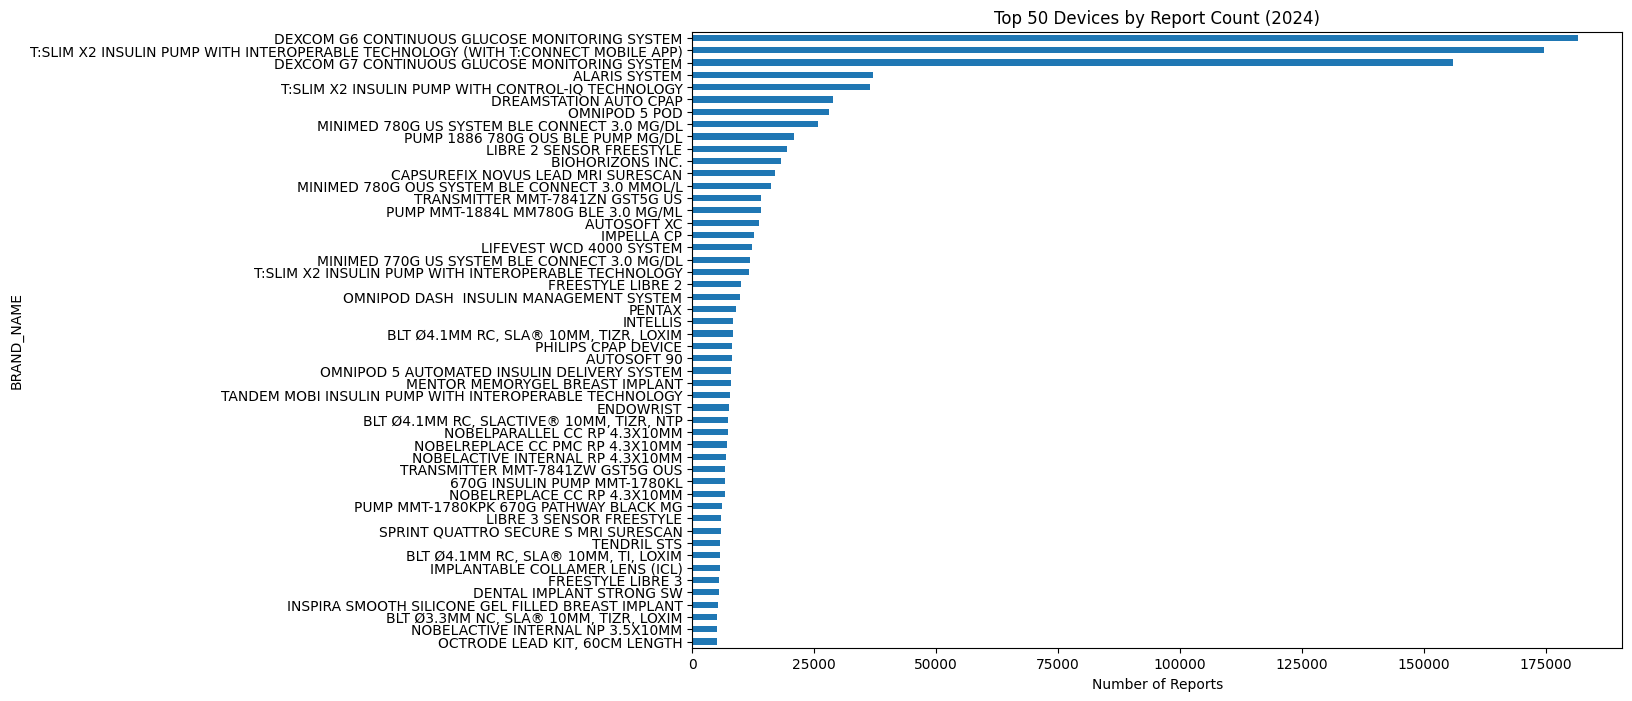

In [2]:
# Show top 50 devices by BRAND_NAME count
top_devices = df['BRAND_NAME'].value_counts().head(50)

print("Top 50 devices by report count:")
print(top_devices)

# Optional bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_devices.plot(kind='barh')
plt.title("Top 50 Devices by Report Count (2024)")
plt.gca().invert_yaxis()
plt.xlabel("Number of Reports")
plt.show()

# 3: Filtering for 4 Glucose Monitoring Devices

In [3]:
target_devices = [
    "DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM",
    "DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM",
    "LIBRE 2 SENSOR FREESTYLE",
    "OMNIPOD 5 POD"
]

# Filter for those devices
df_focus = df[df['BRAND_NAME'].isin(target_devices)].copy()

print("Filtered data shape:", df_focus.shape)
print("Device distribution:\n", df_focus['BRAND_NAME'].value_counts())

Filtered data shape: (385073, 114)
Device distribution:
 BRAND_NAME
DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM    181500
DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM    156001
OMNIPOD 5 POD                                      28078
LIBRE 2 SENSOR FREESTYLE                           19494
Name: count, dtype: int64


## Heatmap

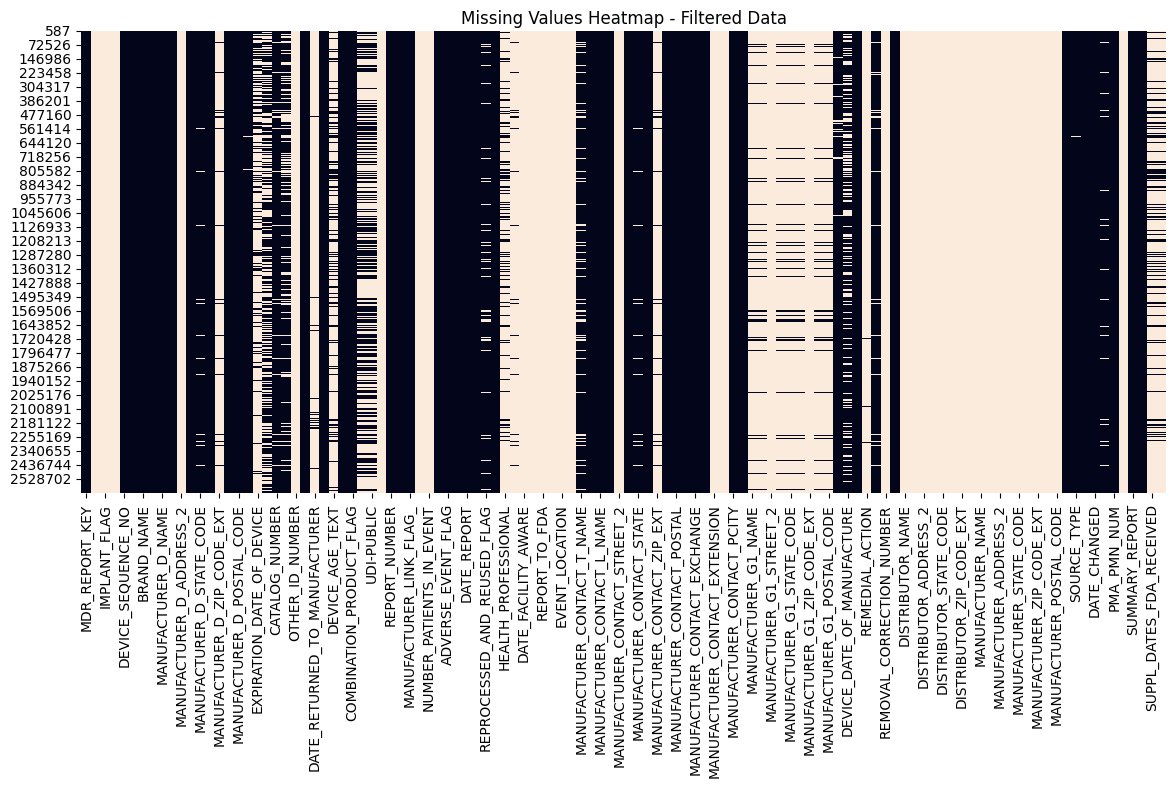

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(df_focus.isnull(), cbar=False)
plt.title("Missing Values Heatmap - Filtered Data")
plt.show()

## Column Overview

In [6]:
missing = df_focus.isnull().sum().sort_values(ascending=False)
print("Missing value counts:\n", missing[missing > 0])

Missing value counts:
 DEVICE_EVENT_KEY                  385073
IMPLANT_FLAG                      385073
MANUFACTURER_D_ADDRESS_2          385073
DATE_REMOVED_FLAG                 385073
REPORT_TO_FDA                     385073
                                   ...  
MANUFACTURER_CONTACT_STREET_1         94
REPORTER_OCCUPATION_CODE              63
SINGLE_USE_FLAG                       53
DEVICE_EVALUATED_BY_MANUFACTUR        26
TYPE_OF_REPORT                         3
Length: 94, dtype: int64


## Data Snapshot

In [7]:
df_focus.head()

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED_x,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,SOURCE_TYPE,DATE_ADDED,DATE_CHANGED,REPORTER_COUNTRY_CODE,PMA_PMN_NUM,EXEMPTION_NUMBER,SUMMARY_REPORT,NOE_SUMMARIZED,SUPPL_DATES_FDA_RECEIVED,SUPPL_DATES_MFR_RECEIVED
587,18423648,NaN,NaN,NaN,1,2024/01/02,LIBRE 2 SENSOR FREESTYLE,FLASH GLUCOSE MONITORING SYSTEM,ABBOTT DIABETES CARE INC,1360 SOUTH LOOP ROAD,...,04,01/02/2024,04/08/2024,FR,K193371,NaN,N,1,01/15/2024,01/14/2024
593,18423654,NaN,NaN,NaN,1,2024/01/02,LIBRE 2 SENSOR FREESTYLE,FLASH GLUCOSE MONITORING SYSTEM,ABBOTT DIABETES CARE INC,1360 SOUTH LOOP ROAD,...,04,01/02/2024,04/10/2024,IT,K193371,NaN,N,1,02/21/2024,02/01/2024
606,18423667,NaN,NaN,NaN,1,2024/01/02,LIBRE 2 SENSOR FREESTYLE,FLASH GLUCOSE MONITORING SYSTEM,ABBOTT DIABETES CARE INC,1360 SOUTH LOOP ROAD,...,04,01/02/2024,01/03/2024,NaN,K193371,NaN,N,1,NaN,NaN
623,18423684,NaN,NaN,NaN,1,2024/01/02,LIBRE 2 SENSOR FREESTYLE,FLASH GLUCOSE MONITORING SYSTEM,ABBOTT DIABETES CARE INC,1360 SOUTH LOOP ROAD,...,04,01/02/2024,04/04/2024,IT,K193371,NaN,N,1,02/16/2024,01/31/2024
625,18423686,NaN,NaN,NaN,1,2024/01/02,LIBRE 2 SENSOR FREESTYLE,FLASH GLUCOSE MONITORING SYSTEM,ABBOTT DIABETES CARE INC,1360 SOUTH LOOP ROAD,...,04,01/02/2024,04/11/2024,IT,K193371,NaN,N,1,02/01/2024,01/31/2024


# 4: Checking Columns and Missing Values

## 4.1: Check Columns and Data Types

In [8]:
# Check column names and data types
print("Column Overview:")
print(df_focus.info())

Column Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 385073 entries, 587 to 2625927
Columns: 114 entries, MDR_REPORT_KEY to SUPPL_DATES_MFR_RECEIVED
dtypes: object(114)
memory usage: 337.9+ MB
None


## 4.2: Missing Values Summary

In [9]:
# Count missing values per column
missing = df_focus.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

print("Missing value counts:")
print(missing)

Missing value counts:
DEVICE_EVENT_KEY                  385073
IMPLANT_FLAG                      385073
MANUFACTURER_D_ADDRESS_2          385073
DATE_REMOVED_FLAG                 385073
REPORT_TO_FDA                     385073
                                   ...  
MANUFACTURER_CONTACT_STREET_1         94
REPORTER_OCCUPATION_CODE              63
SINGLE_USE_FLAG                       53
DEVICE_EVALUATED_BY_MANUFACTUR        26
TYPE_OF_REPORT                         3
Length: 94, dtype: int64


## 4.3: Columns with Single Unique Value

In [10]:
# Show columns with only one unique value
constant_cols = [col for col in df_focus.columns if df_focus[col].nunique(dropna=True) == 1]
print("Columns with only one unique value (can be dropped):")
print(constant_cols)

Columns with only one unique value (can be dropped):
['DEVICE_SEQUENCE_NO', 'DEVICE_AGE_TEXT', 'REPROCESSED_AND_REUSED_FLAG', 'MANUFACTURER_CONTACT_STREET_2', 'MANUFACTURER_CONTACT_ZIP_EXT', 'MANUFACTURER_G1_COUNTRY_CODE', 'REMEDIAL_ACTION', 'EXEMPTION_NUMBER', 'SUMMARY_REPORT', 'NOE_SUMMARIZED']


## 4.4: Unique Values per Column

In [11]:
unique_counts = df_focus.nunique().sort_values(ascending=False)
print("Unique value counts per column:")
print(unique_counts)

Unique value counts per column:
MDR_REPORT_KEY               385071
REPORT_NUMBER                385067
LOT_NUMBER                     9066
UDI-PUBLIC                     5435
SUPPL_DATES_FDA_RECEIVED       4532
                              ...  
MANUFACTURER_POSTAL_CODE          0
MANUFACTURER_STATE_CODE           0
MANUFACTURER_ZIP_CODE             0
MANUFACTURER_ZIP_CODE_EXT         0
MANUFACTURER_COUNTRY_CODE         0
Length: 114, dtype: int64


# 5: Preprocessing and Column Filtering

## 5.1: Drop Columns with Only One Unique Value

In [12]:
# Drop columns with only one unique value
df_focus.drop(columns=constant_cols, inplace=True)

## 5.2: Drop Columns with Too Many Missing Values

In [13]:
# Drop columns with >90% missing values
threshold = 0.9
missing_frac = df_focus.isnull().mean()
drop_cols_na = missing_frac[missing_frac > threshold].index

df_focus.drop(columns=drop_cols_na, inplace=True)

print("Dropped columns with >90% missing values:", list(drop_cols_na))

Dropped columns with >90% missing values: ['DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG', 'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_ZIP_CODE_EXT', 'OTHER_ID_NUMBER', 'DATE_RETURNED_TO_MANUFACTURER', 'EVENT_KEY', 'NUMBER_DEVICES_IN_EVENT', 'NUMBER_PATIENTS_IN_EVENT', 'INITIAL_REPORT_TO_FDA', 'DATE_FACILITY_AWARE', 'REPORT_DATE', 'REPORT_TO_FDA', 'DATE_REPORT_TO_FDA', 'EVENT_LOCATION', 'DATE_REPORT_TO_MANUFACTURER', 'MANUFACTURER_CONTACT_EXTENSION', 'MANUFACTURER_CONTACT_PCOUNTRY', 'MANUFACTURER_G1_NAME', 'MANUFACTURER_G1_STREET_1', 'MANUFACTURER_G1_STREET_2', 'MANUFACTURER_G1_CITY', 'MANUFACTURER_G1_STATE_CODE', 'MANUFACTURER_G1_ZIP_CODE', 'MANUFACTURER_G1_ZIP_CODE_EXT', 'MANUFACTURER_G1_POSTAL_CODE', 'REMOVAL_CORRECTION_NUMBER', 'DISTRIBUTOR_NAME', 'DISTRIBUTOR_ADDRESS_1', 'DISTRIBUTOR_ADDRESS_2', 'DISTRIBUTOR_CITY', 'DISTRIBUTOR_STATE_CODE', 'DISTRIBUTOR_ZIP_CODE', 'DISTRIBUTOR_ZIP_CODE_EXT', 'REPORT_TO_MANUFACTURER', 'MANUFACTURER_NAME', 'MANUFACTURER_ADDRESS_1', 'MANUFAC

## 5.3: Drop Columns with Only Zeros or Nulls (like manufacturer ZIP codes)

In [14]:
# Drop zero-variance columns (optional cleanup)
drop_zero_cols = ['MANUFACTURER_POSTAL_CODE', 'MANUFACTURER_STATE_CODE', 'MANUFACTURER_ZIP_CODE']
df_focus.drop(columns=[col for col in drop_zero_cols if col in df_focus.columns], inplace=True)

# 6: Preview Cleaned Data

In [15]:
print("Shape after dropping low-utility columns:", df_focus.shape)

Shape after dropping low-utility columns: (385073, 59)


In [16]:
print("Remaining columns:")
print(df_focus.columns.tolist())

Remaining columns:
['MDR_REPORT_KEY', 'DATE_RECEIVED_x', 'BRAND_NAME', 'GENERIC_NAME', 'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1', 'MANUFACTURER_D_CITY', 'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE', 'MANUFACTURER_D_COUNTRY_CODE', 'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR', 'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER', 'LOT_NUMBER', 'DEVICE_AVAILABILITY', 'DEVICE_REPORT_PRODUCT_CODE', 'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC', 'REPORT_NUMBER', 'REPORT_SOURCE_CODE', 'MANUFACTURER_LINK_FLAG_', 'DATE_RECEIVED_y', 'ADVERSE_EVENT_FLAG', 'PRODUCT_PROBLEM_FLAG', 'DATE_REPORT', 'DATE_OF_EVENT', 'REPORTER_OCCUPATION_CODE', 'HEALTH_PROFESSIONAL', 'MANUFACTURER_CONTACT_T_NAME', 'MANUFACTURER_CONTACT_F_NAME', 'MANUFACTURER_CONTACT_L_NAME', 'MANUFACTURER_CONTACT_STREET_1', 'MANUFACTURER_CONTACT_CITY', 'MANUFACTURER_CONTACT_STATE', 'MANUFACTURER_CONTACT_ZIP_CODE', 'MANUFACTURER_CONTACT_COUNTRY', 'MANUFACTURER_CONTACT_P

In [17]:
df_focus.sample(5)

,MDR_REPORT_KEY,DATE_RECEIVED_x,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_ZIP_CODE,MANUFACTURER_D_COUNTRY_CODE,...,PREVIOUS_USE_CODE,EVENT_TYPE,TYPE_OF_REPORT,SOURCE_TYPE,DATE_ADDED,DATE_CHANGED,REPORTER_COUNTRY_CODE,PMA_PMN_NUM,SUPPL_DATES_FDA_RECEIVED,SUPPL_DATES_MFR_RECEIVED
2337897,20762558,2024/11/22,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,US,...,I,M,I,04,11/22/2024,12/06/2024,US,DEN170088,NaN,NaN
1483084,19904801,2024/08/05,OMNIPOD 5 POD,AUTOMATED INSULIN DELIVERY SYSTEM,INSULET CORPORATION,100 NAGOG PARK,ACTON,MA,01720,US,...,I,IN,"I,F","01,04",08/05/2024,09/17/2024,US,K231826,08/06/2024,*
2210929,20634740,2024/11/07,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,US,...,I,M,I,"01,04",11/08/2024,12/06/2024,GB,DEN170088,NaN,NaN
1004019,19425946,2024/05/30,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,US,...,I,M,I,04,05/30/2024,07/15/2024,US,DEN170088,NaN,NaN
977262,19399214,2024/05/26,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,US,...,I,M,I,04,05/27/2024,07/15/2024,US,DEN170088,NaN,NaN


#  7: Feature Preparation Based on Project Scope

## 7.1: Drop Useless Columns

In [18]:
drop_cols = [
    'MDR_REPORT_KEY', 'DEVICE_EVENT_KEY', 'REPORT_NUMBER', 'UDI-DI', 'UDI-PUBLIC',
    'DATE_RECEIVED', 'DATE_RETURNED_TO_MANUFACTURER', 'DATE_CHANGED', 'DATE_ADDED'
]

df_focus = df_focus.drop(columns=[col for col in drop_cols if col in df_focus.columns])

## 7.2: Final Feature Set (Store as X)

In [22]:
# Keep a working version
X = df_focus[[
    'BRAND_NAME',
    'GENERIC_NAME',
    'MODEL_NUMBER',
    'LOT_NUMBER',
    'DEVICE_AVAILABILITY',
    'DEVICE_REPORT_PRODUCT_CODE',
    'DEVICE_EVALUATED_BY_MANUFACTUR',
    'EVENT_TYPE',
    'TYPE_OF_REPORT',
    'REPORTER_COUNTRY_CODE',
    'PRODUCT_PROBLEM_FLAG',
    'ADVERSE_EVENT_FLAG'
]].copy()

print("Final feature set shape:", X.shape)
X.sample(5)

Final feature set shape: (385073, 12)


,BRAND_NAME,GENERIC_NAME,MODEL_NUMBER,LOT_NUMBER,DEVICE_AVAILABILITY,DEVICE_REPORT_PRODUCT_CODE,DEVICE_EVALUATED_BY_MANUFACTUR,EVENT_TYPE,TYPE_OF_REPORT,REPORTER_COUNTRY_CODE,PRODUCT_PROBLEM_FLAG,ADVERSE_EVENT_FLAG
2005610,DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,NaN,NI,N,QBJ,N,M,I,US,Y,N
384151,LIBRE 2 SENSOR FREESTYLE,FLASH GLUCOSE MONITORING SYSTEM,71992-01,NaN,R,QLG,Y,M,"I,F",EZ,Y,N
280530,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,9445-24,17277239,R,QBJ,Y,M,"I,F",US,Y,N
2117043,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,9535-45,5337767,N,QBJ,N,M,I,FR,Y,N
1955851,DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,9500-160,1723348001,R,QBJ,Y,M,I,DE,Y,N


# 8: Visual Analysis & Charting (Before Modelling)

## 8.1: Distribution of Reports by Device Brand

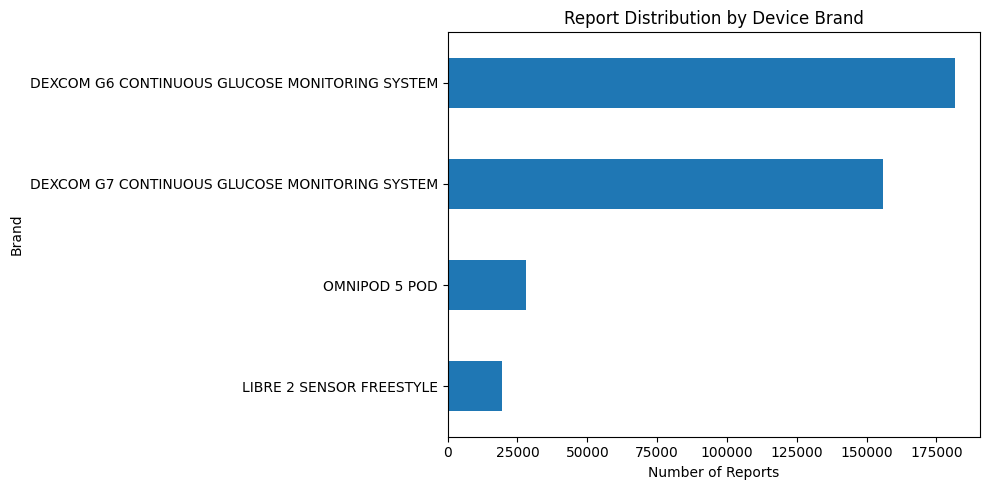

In [23]:
import matplotlib.pyplot as plt

X['BRAND_NAME'].value_counts().plot(kind='barh', figsize=(10, 5))
plt.title("Report Distribution by Device Brand")
plt.xlabel("Number of Reports")
plt.ylabel("Brand")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8.2: Event Type vs Product Problem Flag (Stacked Bar)

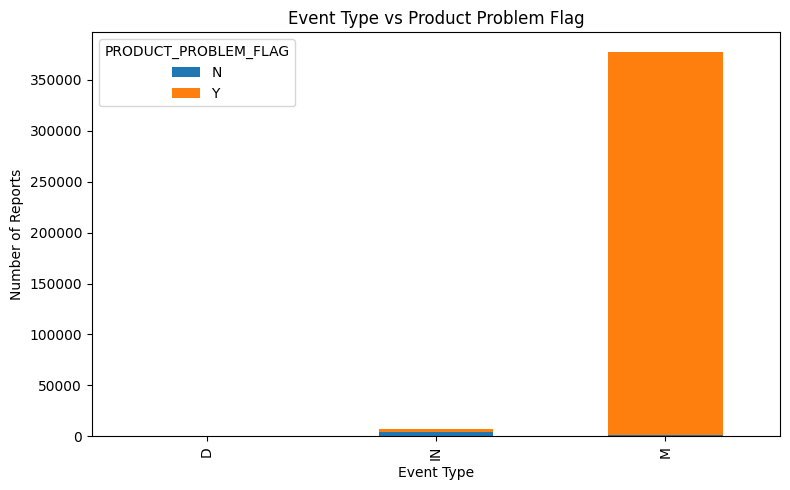

In [24]:
pd.crosstab(X['EVENT_TYPE'], X['PRODUCT_PROBLEM_FLAG']).plot(
    kind='bar', stacked=True, figsize=(8,5))
plt.title("Event Type vs Product Problem Flag")
plt.xlabel("Event Type")
plt.ylabel("Number of Reports")
plt.tight_layout()
plt.show()

## 8.3: Device Availability by Brand (Proportions)

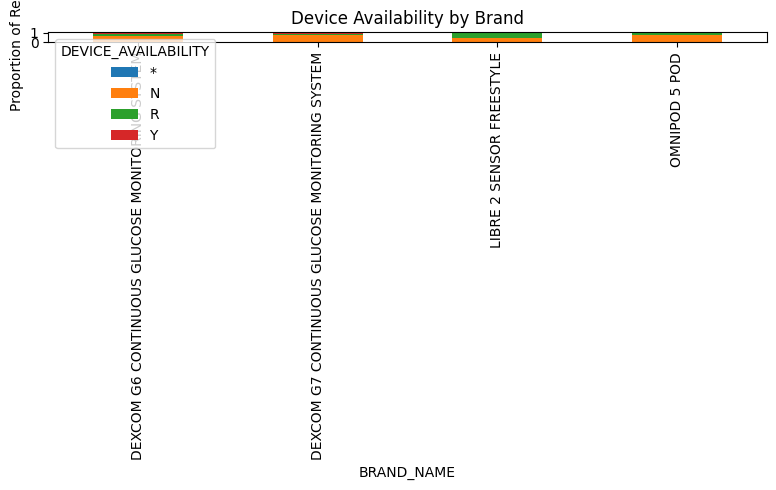

In [25]:
device_avail = pd.crosstab(X['BRAND_NAME'], X['DEVICE_AVAILABILITY'], normalize='index')
device_avail.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Device Availability by Brand")
plt.ylabel("Proportion of Reports")
plt.tight_layout()
plt.show()

## 8.4: Adverse Event Flag vs Report Country

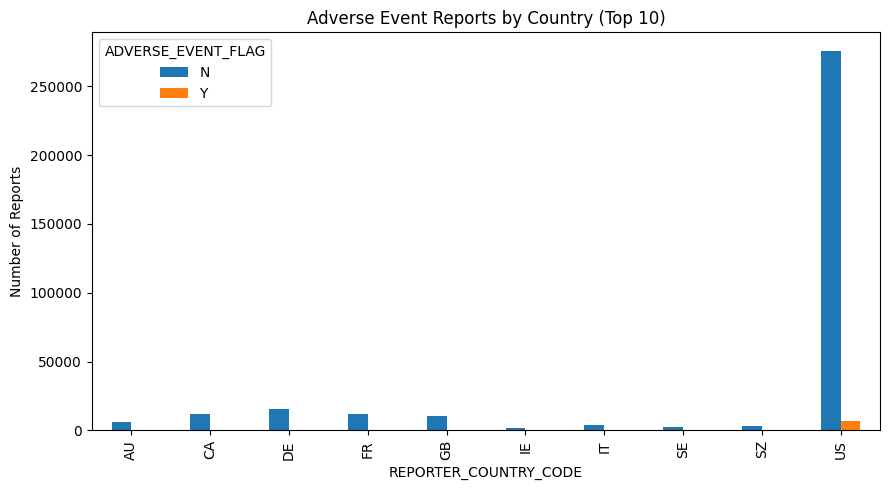

In [26]:
top_countries = X['REPORTER_COUNTRY_CODE'].value_counts().head(10).index
subset = X[X['REPORTER_COUNTRY_CODE'].isin(top_countries)]

pd.crosstab(subset['REPORTER_COUNTRY_CODE'], subset['ADVERSE_EVENT_FLAG']).plot(
    kind='bar', figsize=(9,5))
plt.title("Adverse Event Reports by Country (Top 10)")
plt.ylabel("Number of Reports")
plt.tight_layout()
plt.show()

# 9: Topic Modelling (LDA)

## 9.1: Prepare Text Column

In [27]:
# Convert GENERIC_NAME to lowercase and clean text
X['GENERIC_NAME_CLEAN'] = X['GENERIC_NAME'].fillna("").str.lower().str.replace(r'[^a-zA-Z ]', '', regex=True)

## 9.2: Tokenise and Vectorise

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorise the cleaned text
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(X['GENERIC_NAME_CLEAN'])

## 9.3: Fit LDA Model

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

LatentDirichletAllocation(n_components=5, random_state=42)

## 9.4: Display Topics

In [30]:
# Top words per topic
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx+1}: {', '.join(top_words)}")

display_topics(lda, vectorizer.get_feature_names_out(), 5)

Topic 1: continuous, monitor, glucose, factory, integrated
Topic 2: pump, alternate, enabled, infusion, controller
Topic 3: insulin, delivery, automated, transmitter, kit
Topic 4: continuous, monitor, glucose, calibrated, integrated
Topic 5: glucose, monitoring, flash, continuos, continous


# 10: Anomaly Detection

## 10.1: Isolation Forest for Anomaly Detection

In [33]:
from sklearn.ensemble import IsolationForest

# Selecting relevant features that exist
num_features = ['LOT_NUMBER', 'DEVICE_REPORT_PRODUCT_CODE']

# Encoding non-numeric values
X_numeric = df_focus[num_features].fillna('missing').astype(str).apply(lambda x: pd.factorize(x)[0])

# Fitting Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_focus['anomaly_score'] = iso.fit_predict(X_numeric)

# Summary of anomalies
print("Anomaly Score Distribution:")
print(df_focus['anomaly_score'].value_counts())

Anomaly Score Distribution:
anomaly_score
 1    381229
-1      3844
Name: count, dtype: int64


## 10.2: Visualise Anomalies by Device Brand

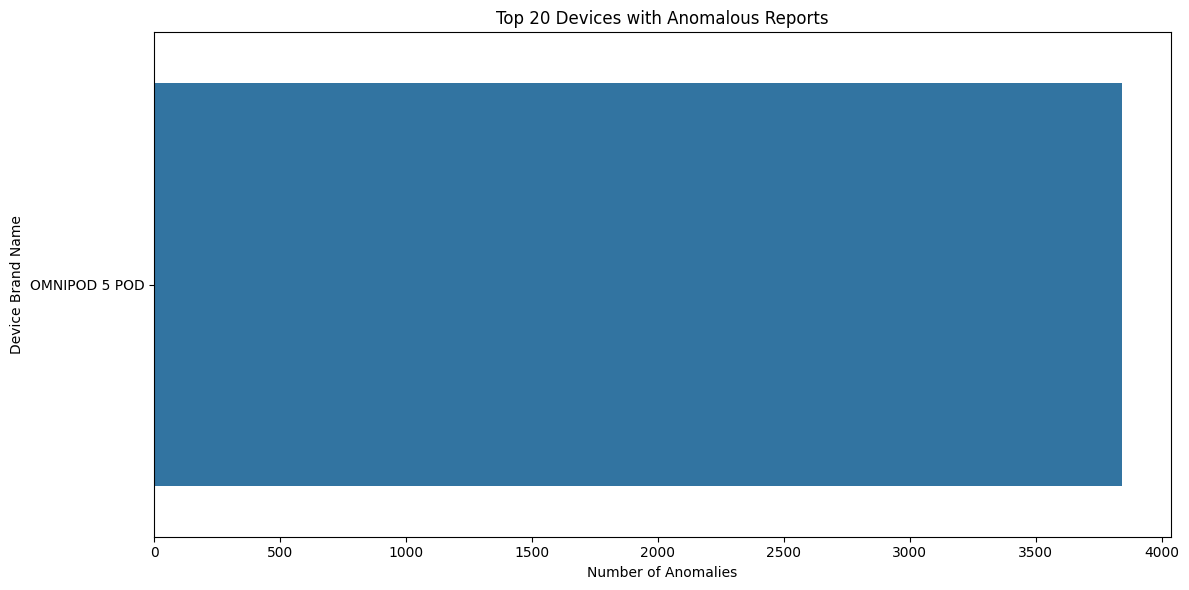

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only anomalies
anomalies = df_focus[df_focus['anomaly_score'] == -1]

# Count anomalies by BRAND_NAME
anomaly_counts = anomalies['BRAND_NAME'].value_counts().head(20)  # Top 20 for readability

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=anomaly_counts.index, x=anomaly_counts.values)
plt.title("Top 20 Devices with Anomalous Reports")
plt.xlabel("Number of Anomalies")
plt.ylabel("Device Brand Name")
plt.tight_layout()
plt.show()

# 11: Supervised Learning – Define Target and Prepare Features

## 11.1: Define and Inspect Target Variable

Target class distribution:
ADVERSE_EVENT_FLAG
N    377741
Y      7332
Name: count, dtype: int64


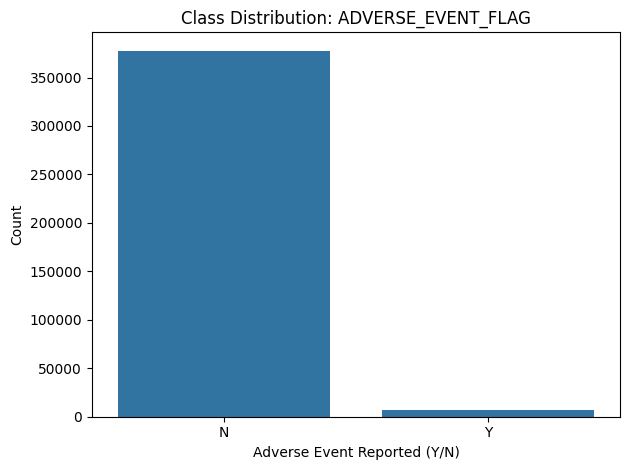

In [35]:
# Check class balance of ADVERSE_EVENT_FLAG
target_col = 'ADVERSE_EVENT_FLAG'

print("Target class distribution:")
print(df_focus[target_col].value_counts())

# Optional: plot class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_focus, x=target_col)
plt.title("Class Distribution: ADVERSE_EVENT_FLAG")
plt.xlabel("Adverse Event Reported (Y/N)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 11.2: Select Features (X) and Prepare for Encoding

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define feature set and target
features = [
    'BRAND_NAME', 'GENERIC_NAME', 'MODEL_NUMBER', 'DEVICE_AVAILABILITY',
    'DEVICE_REPORT_PRODUCT_CODE', 'EVENT_TYPE', 'TYPE_OF_REPORT', 'REPORTER_COUNTRY_CODE'
]
target = 'ADVERSE_EVENT_FLAG'

X = df_focus[features].fillna("Unknown")
y = df_focus[target].map({'Y': 1, 'N': 0})  # Convert to binary

# Encode categorical features
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)],
    remainder='drop'
)

# Build pipeline with RandomForest (you can change this later)
pipeline = Pipeline([
    ('encoder', encoder),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75549
           1       0.98      0.99      0.98      1466

    accuracy                           1.00     77015
   macro avg       0.99      0.99      0.99     77015
weighted avg       1.00      1.00      1.00     77015

[[75517    32]
 [   17  1449]]


# 12: Model Evaluation and Robustness Testing

## 12.1: Classification Report

In [37]:
from sklearn.metrics import classification_report

# Assuming `y_test` is the true labels and `y_pred` is model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75549
           1       0.98      0.99      0.98      1466

    accuracy                           1.00     77015
   macro avg       0.99      0.99      0.99     77015
weighted avg       1.00      1.00      1.00     77015



## 12.2: Confusion Matrix

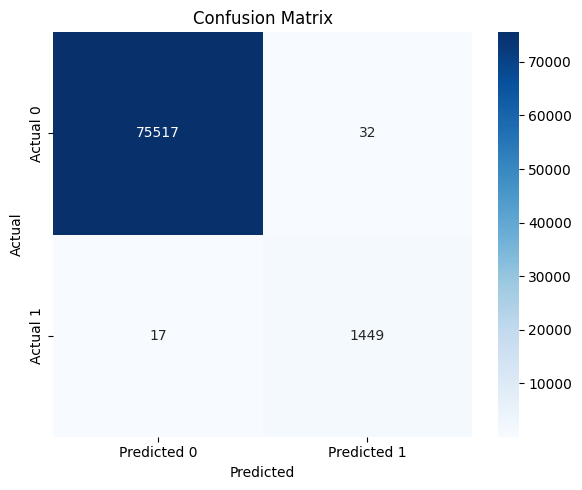

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix from predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Testing More models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Feature columns and target
features = [
    'BRAND_NAME', 'GENERIC_NAME', 'MODEL_NUMBER', 'DEVICE_AVAILABILITY',
    'DEVICE_REPORT_PRODUCT_CODE', 'EVENT_TYPE', 'TYPE_OF_REPORT', 'REPORTER_COUNTRY_CODE'
]
target = 'ADVERSE_EVENT_FLAG'

# Prepare X and y
X = df_focus[features].fillna("Unknown")
y = df_focus[target].map({'Y': 1, 'N': 0})  # Convert Y/N to 1/0

# Encoding pipeline
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)],
    remainder='drop'
)

# Logistic regression model
log_reg_pipeline = Pipeline([
    ('encoder', encoder),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit and predict
log_reg_pipeline.fit(X_train, y_train)
y_pred = log_reg_pipeline.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75549
           1       0.97      0.99      0.98      1466

    accuracy                           1.00     77015
   macro avg       0.98      0.99      0.99     77015
weighted avg       1.00      1.00      1.00     77015

Confusion Matrix:

[[75504    45]
 [   14  1452]]


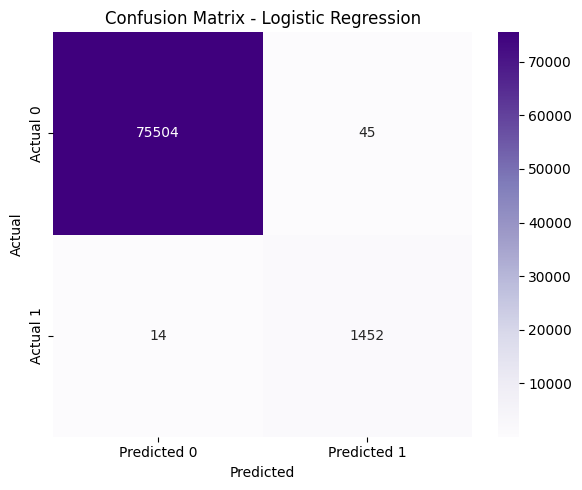

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Manually enter confusion matrix values from your results
conf_matrix = [[75504, 45], [14, 1452]]  # [TN, FP], [FN, TP]

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()